<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/08_pytorch_paper_replicating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (WIP) 08. PyTorch Paper Replicating

TK intro

Want to recreate ViT paper: "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale" - https://arxiv.org/abs/2010.11929 - TK will refer to this as "ViT paper" throughout.

## TK - What is paper replicating?

It's no secret machine learning is advancing fast.

Many of these advances get published in machine learning research papers.

And the goal of **paper replicating** is to take replicate these advances with code so you can use the techniques for your own problem.

For example, let's say a new model architecture gets released that performs better than any other architecture before on various benchmarks, wouldn't it be nice to try that architecture on your own problems?

* TK image: paper replicating = research paper -> code (translate a research paper into usable code)

## TK - What is a machine learning research paper?

A machine learning research paper is a scientific paper that details findings of a research group on a specific area.

The contents of a machine learning research paper can vary from paper to paper but they generally follow the structure:

| **Section** | **Contents** |
| ----- | ----- | 
| **Abstract** | An overview/summary of the paper's main findings/contributions. |
| **Introduction** | What's the paper's main problem and what are previous methods used to try and solve it? |
| **Method** | How did the researchers go about conducting their research? For example, what model(s) were used, data sources, training setups, etc. |
| **Results** | What are the outcomes of the paper? If a new type of model or training setup was used, how did the results of findings compare to previous works (this is where **experiment tracking** comes in handy)? |
| **Conclusion** | What are the limitations of the suggested methods? What are some next steps for the research community? |
| **References** | What resources/other papers did the researchers look at to build their own body of work? |
| **Appendix** | Are there any extra resources/findings to look at that weren't included in any of the above sections? |

## TK - Why replicate a machine learning research paper?

A machine learning research paper is often a presentation of months of work and experiments done by some of the best machine learning teams in the world condensed into a few pages of text.

And if these experiments lead to better results in an area related to the problem you're working on, it'd be nice to them out.

Also, replicating the work of others is a fantastic way to practice your skills.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-george-hotz-quote.png" width=600 alt="george hotz quote saying to get better at being a machine learning engineer, download a paper, implement it and keep going until you have skills"/>

*George Hotz is founder of [comma.ai](https://comma.ai/), a self-driving car company and livestreams machine learning coding on [Twitch](https://www.twitch.tv/georgehotz) and those videos get posted in full to [YouTube](https://www.youtube.com/c/georgehotzarchive). I pulled this quote from one of his livestreams. The "\*" is to note that machine learning engineering often involves the extra step(s) of preprocessing data and making your models available for others to use (deployment).*
    
When you first start trying to replicate research papers, you'll likely be overwhelmed.

That's normal.

Research teams spend weeks, months and sometimes years creating these works so it makes sense if it takes you sometime to even read let alone reproduce the works.

Replicating research is such a tough problem, phenomenal machine learning libraries and tools such as, [HuggingFace](https://huggingface.co/), [PyTorch Image Models](https://github.com/rwightman/pytorch-image-models) (`timm` library) and [fast.ai](https://www.fast.ai/) have been born out of making machine learning research more accessible. 

## TK - Where can you find code examples for machine learning research papers?

One of the first things you'll notice when it comes to machine learning research is: there's a lot of it.

So beware, trying to stay on top of it is like trying to outrun a hamster wheel.

Follow your interest, pick a few things that stand out to you.

In saying this, there are several places to find and read machine learning research papers:
* [arXiv](https://arxiv.org/) - Pronounced "archive", arXiv is a free and open resource for reading technical articles on everything from physics to computer science (inlcuding machine learning).
* [Papers with Code](https://paperswithcode.com/) - A curated collection of trending, active and greatest machine learning papers, many of which include code resources attached. Also includes a collection of common machine learning datasets, benchmarks and current state-of-the-art models.
* [AK Twitter](https://twitter.com/ak92501) - The AK Twitter account publishes machine learning research highlights, often with live demos almost every day. I don't understand 9/10 posts but I find it fun to explore every so often.
* [lucidrains' `vit-pytorch` GitHub repository](https://github.com/lucidrains/vit-pytorch) - Less of a place to find research papers and more of an example of what paper replicating with code on a larger-scale looks like. The `vit-pytorch` repository is a collection of Vision Transformer model architectures from various research papers replicated with PyTorch code (much of the inspiration for this notebook was gathered from this repository). 

TK image: showcase the above

## TK - What we're going to cover

TODO

* ViT -> FoodVision Mini
* Layers = collections of functions to manipulate data -> Architectures = collections of layers (blocks) -> All layers (and blocks) have inputs and outputs
    * Replicating research papers starts by figuring out the inputs and outputs of your layers -> blocks -> model 

## TK - Where can you get help?

All of the materials for this course [are available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch. 

## TK 0. Getting setup 

As we've done previously, let's make sure we've got all of the modules we'll need for this section.

We'll import the Python scripts (such as `data_setup.py` and `engine.py`) we created in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).

To do so, we'll download [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular) directory from the `pytorch-deep-learning` repository (if we don't already have it).

We'll also get the [`torchinfo`](https://github.com/TylerYep/torchinfo) package if it's not available. 

`torchinfo` will help later on to give us a visual representation of our model.

And since later on we'll be using a newer version of the `torchvision` package (as of June 2022), we'll make sure we've got the latest versions.

In [4]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 1.13.0.dev20220606
torchvision version: 0.14.0.dev20220606


> **Note:** If you're using Google Colab, you may have to restart your runtime after running the above cell. After restarting, you can run the cell again and verify you've got the right versions of `torch` and `torchvision`.

Now we'll continue with the regular imports, setting up device agnostic code and this time we'll also get the [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) script from GitHub.

The `helper_functions.py` script contains several functions we created in previous sections:
* `set_seeds()` to set the random seeds (created in [07. PyTorch Experiment Tracking section 0](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#create-a-helper-function-to-set-seeds)).
* `download_data()` to download a data source given a link (created in [07. PyTorch Experiment Tracking section 1](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data)).
* `plot_loss_curves()` to inspect our model's training results (created in [04. PyTorch Custom Datasets section 7.8](https://www.learnpytorch.io/04_pytorch_custom_datasets/#78-plot-the-loss-curves-of-model-0))

> **Note:** It may be a better idea for many of the functions in the `helper_functions.py` script to be merged into `going_modular/going_modular/utils.py`, perhaps that's an extension you'd like to try.


In [7]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

> **Note:** If you're using Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`.

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## TK 1. Get Data

Since we're continuing on with FoodVision Mini, let's download the pizza, steak and sushi image dataset we've been using.

To do so we can use the `download_data()` function from `helper_functions.py` that we created in [07. PyTorch Experiment Tracking section 1](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data).

We'll `source` to the raw GitHub link of the [`pizza_steak_sushi.zip` data](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip) and the `destination` to `pizza_steak_sushi`.

In [9]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

## TK 2. Create Datasets and DataLoaders

UPTOHERE: explain `pin_memory=True`, batch size in the paper, etc etc

TK - Info here about training from scratch etc...

* TK - **Note:** Using `pin_memory=True` in `create_dataloaders()` to speed things up (prevents too many copies from CPU to GPU memory). 

In [6]:
# Setup hyerparameters
BATCH_SIZE = 128 # TK - ViT paper uses higher batch size but set this too high your hardware might not be able to cope
IMG_SIZE = 224

# Setup dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

# Create transform pipeline manually

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=32
)

train_dataloader, test_dataloader, class_names

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


(<torch.utils.data.dataloader.DataLoader at 0x7fd2b2b5bf70>,
 ['pizza', 'steak', 'sushi'])

### TK 2.1 Visualize an image

Let's get visual.

TK An important step in the ViT paper is preparing the images into patches.

In [7]:
image_batch, label_batch = next(iter(train_dataloader))
image, label = image_batch[0], label_batch[0]
# TK - print batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

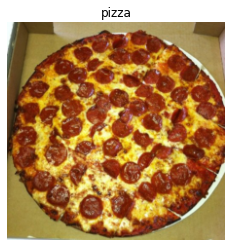

In [8]:
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);

## TK 3. Replicating ViT: Overview

Idea for replicating: 

* Turn the paper into blocks of code
* Replicate one small block at a time 
* Think of a block as either: a *single* layer or a *collection* of layers
    * For understanding: focus on the inputs & outputs of each block to see how they fit together
        * Recall a layer takes some data in (input), modifies it in some way (with a `forward()` method) and then returns it (output) 
    * Since we'll be using pre-built PyTorch layers (recommended), to learn more about each layer, research the documentation or other relative resources
* Combine the blocks at the end

TK - sections of the paper to pay attention to:
* My workflow: Read the whole thing once, go back through each section and turn it into code
* If I get stuck, look up other examples
* Repeat
* Use mathpix.com to turn sections into markdown (for reproducing the paper in notebooks)

Model:
* TK - We are making ViT-Base from Table 1 (though we'll write code so you could adjust it if you wanted to make the other models, however, these models are much larger and will require adequate hardware to run -> start small, increase when necessary).
* TK image - table 1 from the ViT paper -> the different hyperparameters of each model

| Model | Layers | Hidden size $D$ | MLP size | Heads | Params |
| :--- | :---: | :---: | :---: | :---: | :---: |
| ViT-Base | 12 | 768 | 3072 | 12 | $86 \mathrm{M}$ |
| ViT-Large | 24 | 1024 | 4096 | 16 | $307 \mathrm{M}$ |
| ViT-Huge | 32 | 1280 | 5120 | 16 | $632 \mathrm{M}$ |

*Table 1: Details of Vision Transformer model variants. Source: [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)*

## TK 4. Split data into patches

Want to visualize the data and see if it can be split into patches with a Conv2D layer.

See Figure 1 - the image gets embedded into patches, that's what I want to create

Also section 3.1:

> To handle 2D images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened 2D patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer.
> 
> "All models use an image size of 224"

To handle 2D images, we reshape the image `x` (HxWxC) -> `x` (Nx(P^2•C)) where:
* (H, W) is the resolution of the original image
* C is the number of channels
* (P, P) is the resolution of each patch
* N = HW/P^2

Patch size from paper: "ViT-B/16 means the “Large” variant with 16×16 input patch size"

Let's say I want patches of 16x16, I want a Conv2d with:
* in_channels=3 (number of channels)
* out_channels=D (number of hidden units)
* kernel=patch_size (make the kernel the patch)
* padding="same" (want to keep the same dimensions of the input as the output)
* stride=patch_size (stride the size of the patch)

In [9]:
# Example of calculating N
PATCH_SIZE = 16
IMG_SIZE = 224
height, width = IMG_SIZE, IMG_SIZE
N = (height * width) / PATCH_SIZE ** 2
N

196.0

In [10]:
# Example of calculating output shape
16**2 * 3

768

In [11]:
from torch import nn
patch_size=16

# Create the embedding and the patch in one hit 
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=768, # from Table 1: Hidden size D
                   kernel_size=PATCH_SIZE,
                   stride=PATCH_SIZE,
                   padding=0)

flatten = nn.Flatten(start_dim=2, 
                     end_dim=3) # https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html 

In [12]:
# Now we have a patchified image of 256 tokens + an embedding for each patch
patch_image_out_of_conv = conv2d(image.unsqueeze(0))
print(patch_image_out_of_conv.shape)
patch_image = flatten(conv2d(image.unsqueeze(0)))
patch_image.shape

torch.Size([1, 768, 14, 14])


torch.Size([1, 768, 196])

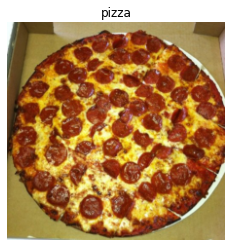

In [13]:
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);

Showing 10 random Conv2d patches from index 709 to 719


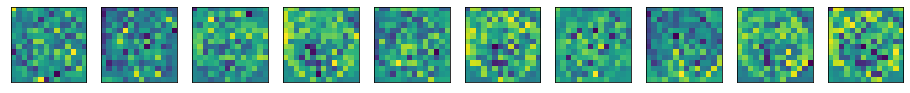

In [14]:
# Plot random 10 conv patches
import random
random_start = random.randint(0, 758)
random_end = random_start + 10
print(f"Showing 10 random Conv2d patches from index {random_start} to {random_end}")
patches = patch_image_out_of_conv[:, random_start:random_start+10, :, :]

fig, axs = plt.subplots(ncols=10, squeeze=False, figsize=(16, 16))
for i in range(10):
    axs[0, i].imshow(patches[:, i, :, :].squeeze().detach().numpy())
    axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

In [15]:
# Get image in shape [batch_size, N, P^2*C]
patch_image.transpose(-2, -1).shape

torch.Size([1, 196, 768])

In [16]:
# Get image in shape [batch_size, N, P^2*C]
reshaped_patch_image = patch_image.permute(0, 2, 1)
reshaped_patch_image.shape

torch.Size([1, 196, 768])

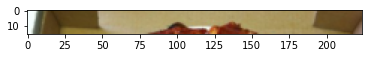

In [17]:
# Color channels, height, width
# Want the top row
plt.imshow(image[:, :patch_size, :].permute(1, 2, 0));

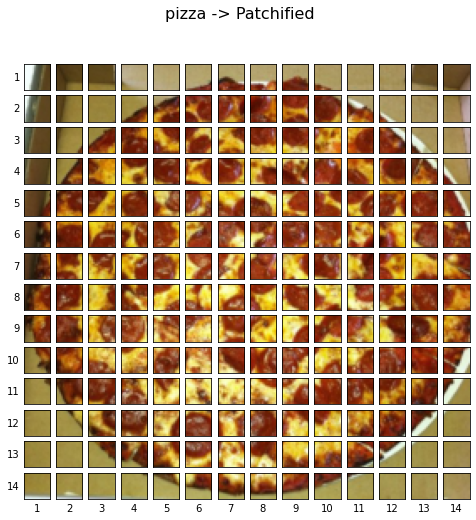

In [18]:
PATCH_SIZE = 16
IMG_SIZE = 224
assert image.shape[1] % PATCH_SIZE == 0, "Image size must be divisble by patch size." 

# Create a series of subplots
fig, axs = plt.subplots(nrows=IMG_SIZE // PATCH_SIZE, # need int not float
                        ncols=IMG_SIZE // PATCH_SIZE, 
                        figsize=(PATCH_SIZE // 2, PATCH_SIZE // 2),
                        sharex=True,
                        sharey=True)

# Go from (C, H, W) -> (H, W, C) for matplotlib 
image_permuted = image.permute(1, 2, 0)
for i, patch_h in enumerate(range(0, IMG_SIZE, PATCH_SIZE)):
    for j, patch_w in enumerate(range(0, IMG_SIZE, PATCH_SIZE)):
        # Plot coordinates = (i, j)
        # print(f"On patch: {i+1}, {j+1}")
        
        # Plot the permuted image (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_h:patch_h+PATCH_SIZE, # iterate through height 
                                        patch_w:patch_w+PATCH_SIZE, # iterate through width
                                        :]) # get all color channels
        
        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(i+1, 
                             rotation="horizontal", 
                             horizontalalignment="right", 
                             verticalalignment="center") 
        axs[i, j].set_xlabel(j+1) 
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

### TK 4.1 Create patching layer

TK - see "Hybrid Architecture" in section 3.1 in the ViT paper 

In [19]:
class PatchEmbedding(nn.Module):
    def __init__(self, 
                 in_channels=3,
                 patch_size=16,
                 embedding_dim=768):
        super().__init__()
        
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        self.flatten = nn.Flatten(start_dim=2, # only flatten the 2nd last and last dim
                                  end_dim=3)

    def forward(self, x):
        # print(x.shape)
        x_patched = self.patcher(x)
        # print(x_patched.shape)
        x_flattened = self.flatten(x_patched)
        # print(x_flattened.shape)
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2*C, N] -> [batch_size, N, P^2*C] 

In [20]:
patchify = PatchEmbedding()
patched_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
patched_image.shape

torch.Size([1, 196, 768])

## TK. 5. Create MSA (Multihead Self-Attention)

See docs - https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html

Heads = 12 

In [21]:
class MultiheadSelfAttentionBlock(nn.Module):
    """Creates a multi-head self-attention block ("MSABlock" for short).
    
    Uses PyTorch's torch.nn.MultiheadAttention: https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html
    Source code for what's happening behind the scenes: https://github.com/pytorch/pytorch/blob/master/torch/nn/functional.py#L4909
    """
    def __init__(self,
                 embedding_dim=768, # From Table 1
                 num_heads=12, # From Table 1
                 attn_dropout=0): # Doesn't look like the paper uses any dropout in MSABlocks
        super().__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True)

    def forward(self, x):
        attn_output, _ = self.multihead_attn(query=x,
                                             key=x,
                                             value=x,
                                             need_weights=False)
        return attn_output

In [22]:
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, 
                                                             num_heads=12)
patched_image_through_msa_block = multihead_self_attention_block(patched_image)
patched_image_through_msa_block.shape

torch.Size([1, 196, 768])

## TK 6. Create feedforward model (MLP)

> Dropout, when used, is applied after every dense layer except for the the qkv-projections and directly after adding positional- to patch embeddings. 

> The MLP contains two layers with a GELU non-linearity

$$
\begin{aligned}
\mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L
\end{aligned}
$$ 

In [23]:
# Could also call this "FeedForward"
class MLPBlock(nn.Module):
    """Creates an MLPBlock of the Vision Transformer architecture."""
    def __init__(self,
                 embedding_dim, # embedding dimension (Hidden Size D in Table 1)
                 mlp_size, # MLP size in Table 1
                 dropout=0): # "Dropout... is applied to every dense layer... (Appendix B.1)"
        super().__init__()
        
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(), # "The MLP contains two layers with a GELU non-linearity (section 3.1)."
            nn.Dropout(p=dropout),
            nn.GELU(),
            nn.Linear(in_features=mlp_size, # needs to take same in_features as out_features of layer above
                      out_features=embedding_dim) # take back to embedding_dim
        )

    def forward(self, x):
        return self.mlp(x)

In [24]:
mlp_block = MLPBlock(embedding_dim=768, # Table 1 
                     mlp_size=3072) # Table 1
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
patched_image_through_mlp_block.shape

torch.Size([1, 196, 768])

## TK 7. Create transformer block



In [25]:
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    def __init__(self,
                 embedding_dim=768, # From Table 1
                 num_heads=12, # From Table 1
                 mlp_size=3072, # From Table 1
                 mlp_dropout=0.1,
                 attn_dropout=0):
        super().__init__()

        # Create MSA Block (for equation 2)
        self.msa_block = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                      num_heads=num_heads,
                                                      attn_dropout=attn_dropout))
        
        # Create MLP Block (for equation 3)
        self.mlp_block = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            MLPBlock(embedding_dim=embedding_dim,
                     mlp_size=mlp_size,
                     dropout=mlp_dropout))

    def forward(self, x):
        x = self.msa_block(x) + x # Create skip connection
        x = self.mlp_block(x) + x # Create skip connection
        return x

## TK 8. Putting it all together to create ViT

Combine the transformer blocks and patched embedding into a ViT architecture.

In [26]:
class ViT(nn.Module):
    """Creates a Vision Transformer architecture."""
    def __init__(self,
                 img_size=224, # From Table 3 in ViT paper
                 in_channels=3,
                 patch_size=16,
                 num_transformer_layers=12, # From Table 1 in ViT paper
                 embedding_dim=768,
                 mlp_size=3072,
                 num_heads=12,
                 attn_dropout=0,
                 mlp_dropout=0.1,
                 embedding_dropout=0.1,
                 num_classes=1000): # default for ImageNet
        super().__init__() # don't for the super().__init__()!
    
        # Get image size
        self.img_height, self.img_width = img_size, img_size
        
        # Calculate number of patches (height * width/patch^2)
        self.num_patches = (self.img_height * self.img_width) // patch_size**2
        
        # Create position embedding (from index 1 -> last of patch embedding size)
        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)
                 
        # Create class embedding (needs to go at front of sequence embedding)
        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                            requires_grad=True)
                
        # Create embedding dropout
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)
        
        # Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        
        # Create transformer encoder blocks
        self.transformer_enedoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])
       
        # Create classifier head (equation 4)
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim, 
                      out_features=num_classes)
        )
    
    def forward(self, x):
        # Get batch size
        batch_size = x.shape[0]
        # Create class token embedding
        class_token = self.class_embedding.expand(batch_size, -1, -1)

        # Create patch embedding
        x = self.patch_embedding(x)

        # Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)

        # Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x

        # Run embedding dropout
        x = self.embedding_dropout(x)

        # Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_enedoder(x)

        # Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x
        

In [27]:
batch_size = 32
class_tokens = nn.Parameter(data=torch.randn(1, 1, 768))
class_tokens.expand(batch_size, -1, -1).shape

torch.Size([32, 1, 768])

In [28]:
set_seeds()
device = "cuda" if torch.cuda.is_available() else "cpu"
rand_image = torch.randn(1, 3, 224, 224)
# vit = ViT(num_classes=len(class_names)) 
vit = ViT(num_classes=3)
vit(rand_image)

tensor([[0.6055, 1.3140, 0.2506]], grad_fn=<AddmmBackward0>)

## TK 9. Inspect the model

> **Note:** If you go too big, your hardware might not be able to handle it... (e.g. too high of a batch size...)

TK - Number of parameters should be equivalent to: https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16 (`num_params=86,567,656`)

In [29]:
from torchinfo import summary

# TK - clean up the summary so it looks nice when it prints out 
# Print a summary using torchinfo (uncomment for actual output)
summary(model=vit, 
        input_size=(128, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                                     Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                                   [128, 3, 224, 224]   [128, 3]             152,064              True
├─Dropout (embedding_dropout)                                               [128, 197, 768]      [128, 197, 768]      --                   --
├─PatchEmbedding (patch_embedding)                                          [128, 3, 224, 224]   [128, 196, 768]      --                   True
│    └─Conv2d (patcher)                                                     [128, 3, 224, 224]   [128, 768, 14, 14]   590,592              True
│    └─Flatten (flatten)                                                    [128, 768, 14, 14]   [128, 768, 196]      --                   --
├─Dropout (embedding_dropout)                                               [128, 197, 768]      [128, 197, 768]      --               

* TK - same number of parameters as: https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16 -> 86567656

In [30]:
batch_size = 32
cls_embedding = nn.Parameter(torch.randn(1, 1, 768))
# See here: https://pytorch.org/docs/stable/generated/torch.Tensor.expand.html
cls_embedding.shape, cls_embedding.expand(batch_size, -1, -1).shape

(torch.Size([1, 1, 768]), torch.Size([32, 1, 768]))

## TK 10. Train model



In [31]:
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=vit.parameters(), 
                             lr=1e-3,
                             betas=(0.9, 0.999), # default
                             weight_decay=0.1) # from the ViT paper section 4.1
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.8765 | train_acc: 0.3516 | test_loss: 1.8075 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.7652 | train_acc: 0.2500 | test_loss: 1.8281 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.7685 | train_acc: 0.2930 | test_loss: 1.0586 | test_acc: 0.5417
Epoch: 4 | train_loss: 1.3442 | train_acc: 0.3906 | test_loss: 1.6053 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.2500 | train_acc: 0.2969 | test_loss: 1.0597 | test_acc: 0.4811
Epoch: 6 | train_loss: 1.1027 | train_acc: 0.4258 | test_loss: 1.2707 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.1864 | train_acc: 0.2578 | test_loss: 1.3656 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1701 | train_acc: 0.3047 | test_loss: 1.2117 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.1279 | train_acc: 0.4219 | test_loss: 1.0078 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.1814 | train_acc: 0.2344 | test_loss: 1.1760 | test_acc: 0.2604


## TK 11. Evaluate model

TK - plot the loss curves

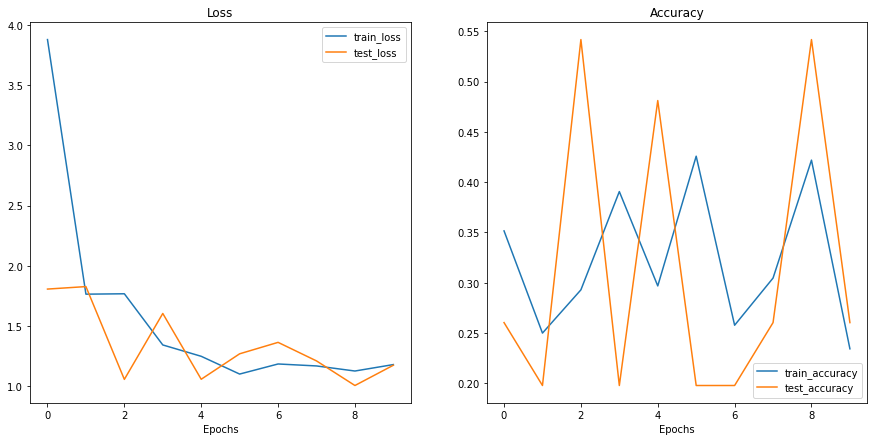

In [32]:
from helper_functions import plot_loss_curves

plot_loss_curves(results)

TK - why do the loss curves look the way they do? (too big of a model, not enough data)

## TK 12. Bring in pretrained ViT from `torchvision.models` on same dataset 

* Get a similar model from here - https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16 

In [33]:
# The following requires torch v0.12+ and torchvision v0.13+
import torch
import torchvision
print(torch.__version__) 
print(torchvision.__version__)

1.13.0.dev20220606
0.14.0.dev20220606


In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
# Set seeds
def set_seeds(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [36]:
# Requires torchvision >= 0.13
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False
    
# Change the classifier head
set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [37]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit, 
        input_size=(128, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                                Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                                  [128, 3, 224, 224]   [128, 3]             768                  Partial
├─Conv2d (conv_proj)                                                   [128, 3, 224, 224]   [128, 768, 14, 14]   (590,592)            False
├─Encoder (encoder)                                                    [128, 197, 768]      [128, 197, 768]      151,296              False
│    └─Dropout (dropout)                                               [128, 197, 768]      [128, 197, 768]      --                   --
│    └─Sequential (layers)                                             [128, 197, 768]      [128, 197, 768]      --                   False
│    │    └─EncoderBlock (encoder_layer_0)                             [128, 197, 768]      [128, 197, 768]      (7,087,872)          False
│    │    └─Encod

In [38]:
# TK - the above output has the same number of parameters as our own created model

In [39]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

In [40]:
train_dir = image_path / "train"
test_dir = image_path / "test" 
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [41]:
# Create dataset for pretrained ViT
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=1024) # From here: https://arxiv.org/abs/2205.01580 (there are other improvements there too...)


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [42]:
# Train pretrained feature extractor ViT for 5 epochs on Pizza, Steak, Sushi
# TK - can probably increase the batch_size here because we're using feature extraction and not 
# training the whole model
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), 
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1490 | train_acc: 0.2356 | test_loss: 1.0584 | test_acc: 0.4667
Epoch: 2 | train_loss: 1.0017 | train_acc: 0.5289 | test_loss: 0.9194 | test_acc: 0.6400
Epoch: 3 | train_loss: 0.8716 | train_acc: 0.7244 | test_loss: 0.7983 | test_acc: 0.6667
Epoch: 4 | train_loss: 0.7583 | train_acc: 0.8089 | test_loss: 0.6942 | test_acc: 0.7733
Epoch: 5 | train_loss: 0.6608 | train_acc: 0.8622 | test_loss: 0.6060 | test_acc: 0.8800
Epoch: 6 | train_loss: 0.5777 | train_acc: 0.8889 | test_loss: 0.5318 | test_acc: 0.8933
Epoch: 7 | train_loss: 0.5076 | train_acc: 0.9156 | test_loss: 0.4700 | test_acc: 0.9067
Epoch: 8 | train_loss: 0.4487 | train_acc: 0.9244 | test_loss: 0.4188 | test_acc: 0.9333
Epoch: 9 | train_loss: 0.3993 | train_acc: 0.9378 | test_loss: 0.3765 | test_acc: 0.9333
Epoch: 10 | train_loss: 0.3580 | train_acc: 0.9378 | test_loss: 0.3417 | test_acc: 0.9467


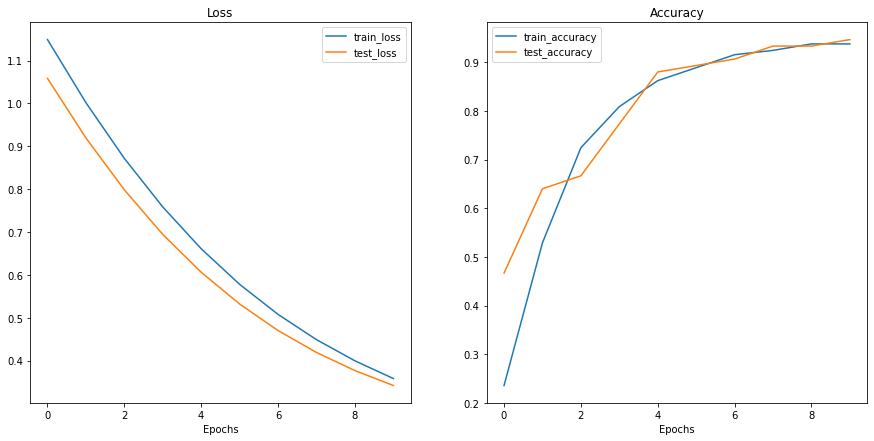

In [43]:
# Plot the loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results) 

In [44]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=pretrained_vit,
                 target_dir="models",
                 model_name="08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth")

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


In [45]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth").stat().st_size // (1024*1024)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


## TK - Exercises

## TK - Extra-curriculum

* See the illustrated transformer for an overview of the Transformer model:  https://jalammar.github.io/illustrated-transformer/